In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("Housing.csv")

In [3]:
#housing.head()

In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       507 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    int64  
 9   TAX      507 non-null    int64  
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.6 KB


In [5]:
#housing['CHAS'].value_counts()

In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean     3.606490   11.341223   11.138343    0.069034    0.554731    6.284132   
std      8.594501   23.304861    6.853661    0.253762    0.115766    0.702014   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081930    0.000000    5.190000    0.000000    0.449000    5.886000   
50%      0.253870    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.675945   12.500000   18.100000    0.000000    0.624000    6.622000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean    68.599014    3.792498    9.532544  407.970414   18.460552  356.753373   
std     28.126273    2.104408    8.706934  168.477585    2.165755   91.222103   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.050000    2.100350    4.000000  279.000000   17.400000  375.425000   
50%     77.700000    3.199200    5.000000  330.000000   19.100000  391.450000   
75%     94.050000    5.164950   24.000000  666.000000   20.200000  396.235000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  507.000000  507.000000  
mean    12.643649   22.511834  
std      7.137150    9.200138  
min      1.730000    5.000000  
25%      6.970000   16.900000  
50%     11.340000   21.200000  
75%     16.950000   25.000000  
max     37.970000   50.000000

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

# Train-test splitting

In [9]:
#for learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size= int(len(data) * test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [10]:
#train_set,test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 405
Rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [14]:
strat_test_set['CHAS'].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    377
1     28
Name: CHAS, dtype: int64

In [16]:
housing=strat_train_set.copy()



In [17]:
housing.shape


(405, 14)

# Looking for correlations


In [18]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677192
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
LSTAT     -0.736915
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

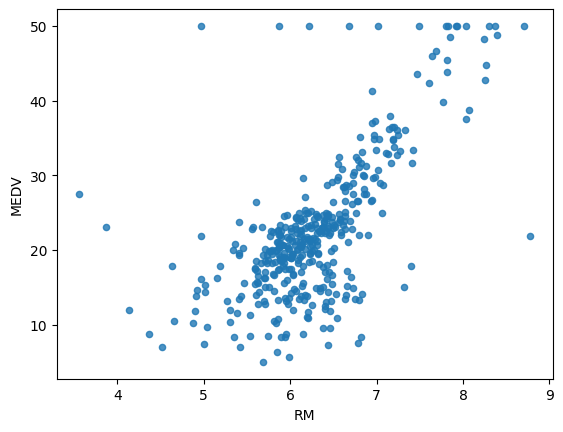

In [19]:
housing.plot(kind="scatter",x="RM",y="MEDV", alpha=0.8)

# Trying out attributes

In [20]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [21]:
housing["TAXRM"]

104    62.266904
240    43.497173
174    50.520567
146    71.606254
110    61.985472
         ...    
142    74.588192
114    69.075791
178    43.148688
321    45.012547
234    45.643770
Name: TAXRM, Length: 405, dtype: float64

In [22]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
104  0.13960   0.0   8.56     0  0.520  6.167   90.0  2.4210    5  384   
240  0.11329  30.0   4.93     0  0.428  6.897   54.3  6.3361    6  300   
174  0.08447   0.0   4.05     0  0.510  5.859   68.7  2.7019    5  296   
146  2.15505   0.0  19.58     0  0.871  5.628  100.0  1.5166    5  403   
110  0.10793   0.0   8.56     0  0.520  6.195   54.4  2.7778    5  384   

     PTRATIO       B  LSTAT  MEDV      TAXRM  
104     20.9  392.69  12.33  20.1  62.266904  
240     16.6  391.25  11.38  22.0  43.497173  
174     16.6  393.23   9.64  22.6  50.520567  
146     14.7  169.27  16.65  15.6  71.606254  
110     20.9  393.49  13.00  21.7  61.985472

In [23]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.677192
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
TAXRM     -0.519506
LSTAT     -0.736915
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

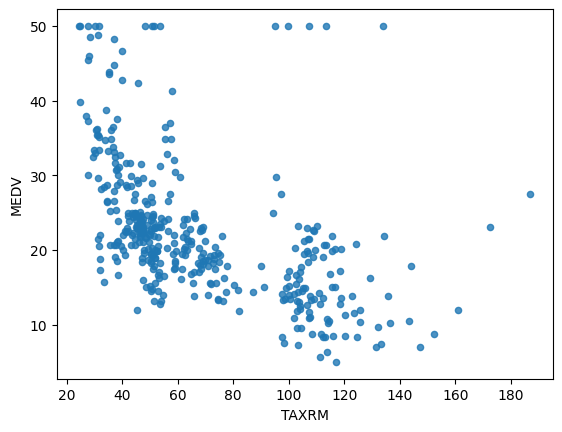

In [24]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV", alpha=0.8)

In [25]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# missing attributes

In [26]:
# to take care of missing attributes,I have 3 options:
# 1. get rid of missing data points
# 2. Get rid of whole column
# 3. Set the value to some value(0,mean or median)

In [27]:
# option 1 The 'inplace=True' argument stands for the data frame has to make changes permanent
# df.dropna(axis='index', how='all', inplace=True).



In [28]:
a = housing.dropna(subset=["RM"]).shape   #option 1
a


(405, 13)

In [29]:
housing.drop("RM",axis=1).shape
#option 2

(405, 12)

In [30]:
median =housing["RM"].median() 

In [31]:
housing["RM"].fillna(median)  #option 3

104    6.167
240    6.897
174    5.859
146    5.628
110    6.195
       ...  
142    5.403
114    6.254
178    6.860
321    6.376
234    6.726
Name: RM, Length: 405, dtype: float64

In [32]:
#original dataframe is unchanged in 3 cases

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.8392e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2090e+00, 7.7700e+01, 3.1323e+00, 5.0000e+00, 3.3700e+02,
       1.9000e+01, 3.9095e+02, 1.1480e+01])

In [35]:
X=imputer.transform(housing)

In [36]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_tr.shape

(405, 13)

# Scikit-Design


In [38]:
# primarily three types of objects
# 1. Estimators  estimates some parameter based on a dataset; 
# it has a fit and transform method. Fit method - fits the dataset and calc internal parameters, stategy=hyper parameters

# 2. Transforms - imputer acts as transformer also ,takes input and returns output based on learnings from fit().
# It has convenience function called fit_transform(),it fits and then transforms.

# 3. Predictors - LinearRegression ,2 functions fit() and predict(),score() evaluate the predictions

# FEATURE SCALING

In [39]:
#feature scaling: scale equaling 
# 1. Min-max scaling (NORMALIZATION)=> (), (value-min)/(max-min) => sklearn provides a class MinMaxScaler
# 2. Standardization => (value-mean)/std => sklearn provides a class called StandardScaler for this, min max value won't be affected that much

# PIPELINE CREATING

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

housing_num_tr = my_pipeline.fit_transform(housing)


In [41]:
housing_num_tr.shape


(405, 13)

# Selecting a desired model for Dragon Real Estate

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


RandomForestRegressor()

In [43]:
somedata = housing.iloc[:5]

In [44]:
some_labels= housing_labels.iloc[:5]

In [45]:
prepared_data=my_pipeline.transform(somedata)



In [46]:
model.predict(prepared_data)

array([19.99 , 23.757, 21.935, 15.531, 21.653])

In [47]:
list(some_labels)


[20.1, 22.0, 22.6, 15.6, 21.7]

# EVALUATING THE MODEL

In [48]:
from sklearn.metrics import mean_squared_error 
housing_pred= model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_pred)
rmse = np.sqrt(mse)

In [49]:
rmse    #overfitting

1.1447751776691375

# USING BETTER EVALUATION TECHNIQUE- Cross Validation

In [50]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
#for greater utility neg taken
rmse_scores =np.sqrt(-scores)

In [51]:
rmse_scores

array([3.16826768, 3.01441461, 4.7656167 , 3.05548242, 2.74941441,
       2.73719406, 3.74612704, 3.05664931, 4.28372051, 2.83772396])

In [52]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:" ,scores.std())
print_scores(rmse_scores)

Scores: [3.16826768 3.01441461 4.7656167  3.05548242 2.74941441 2.73719406
 3.74612704 3.05664931 4.28372051 2.83772396]
Mean: 3.341461070501888
Standard deviation: 0.6594764934998898



# Saving the data

In [53]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# testing the model on test data

In [54]:
X_test= strat_test_set.drop("MEDV",axis=1)
Y_test= strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.42  12.206 25.672 21.525 18.413 14.871 20.608 14.72  31.577 41.925
 19.127 11.615 22.824 32.491 19.43  11.066 30.998 13.92  23.409 18.652
 19.685 17.821 18.453 21.762 18.659 31.062 16.36  32.526  8.98  33.112
 23.086 14.77  22.237 10.916 21.101 10.769 43.598 24.305 23.299 42.331
 24.058 31.814 20.323 20.779 18.541 33.784 44.059 19.927 14.143 22.204
 20.224 14.562 21.057 15.224 25.228 32.416 42.136 28.775 18.963 20.191
 47.176 10.295 18.65  25.543 14.483 32.978 19.494 17.624 19.014 33.743
 25.005 22.255 21.56  22.307 34.527 10.312 15.891 20.215 20.246 21.587
 22.013 15.477 14.408 21.953 20.63  27.434 14.031 21.333 30.318 23.006
 18.252 27.028  7.276 26.741 19.174 29.356 20.177 31.007 14.547 26.7
 21.289 20.304] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 19.7, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 16.1, 32.0, 7.2, 34.6, 20.1, 15.2, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [55]:
final_rmse

2.9239473151821285

In [56]:
prepared_data


array([[-4.28692797e-01, -4.89081145e-01, -4.05038805e-01,
        -2.72526250e-01, -3.27547450e-01, -1.59674347e-01,
         7.54941740e-01, -6.34323905e-01, -5.44677469e-01,
        -1.65778329e-01,  1.13740278e+00,  4.09156392e-01,
        -5.64606918e-02],
       [-4.31948994e-01,  8.68236331e-01, -9.37252952e-01,
        -2.72526250e-01, -1.11616561e+00,  8.72639688e-01,
        -5.09430454e-01,  1.23703251e+00, -4.30320613e-01,
        -6.65138943e-01, -8.83395974e-01,  3.94128467e-01,
        -1.89154181e-01],
       [-4.35515836e-01, -4.89081145e-01, -1.06627456e+00,
        -2.72526250e-01, -4.13266815e-01, -5.95226022e-01,
         5.68414377e-04, -5.00058109e-01, -5.44677469e-01,
        -6.88918019e-01, -8.83395974e-01,  4.14791864e-01,
        -4.32192783e-01],
       [-1.79255205e-01, -4.89081145e-01,  1.21066365e+00,
        -2.72526250e-01,  2.68120226e+00, -9.21889779e-01,
         1.10910762e+00, -1.06661293e+00, -5.44677469e-01,
        -5.28277145e-02, -1.77630705e

# Using the model

In [57]:
from joblib import dump,load
import numpy as np
model =load('Dragon.joblib')
features= np.array([[-4.28692797e-01, -4.89081145e-01, -4.05038805e-01,
        -2.72526250e-01, -3.27547450e-01, -1.59674347e-01,
         7.54941740, -6.34323905, -5.44677469,
        -1.65778329e-01,  1.13740278e+00,  4.09156392e-01,
        -5.64606918e-02]])
model.predict(features)

array([36.121])